# Quantum circuits, strings and Parametrisation
## By: Mushfika Rahman. Sadia Nasrin Tisha



1. [Packages](#packages)
1. [References](#references)
1. [Things to install](#install)


#### we changed the sentence length
#### we experimented with different sentence also
#### we experimented  the number of layers

In [ ]:
!pip install lambeq

In [ ]:
!pip install lambeq[extras]

In [ ]:
!pip install cython numpy 


In [ ]:
!pip install lambeq[depccg]

In [ ]:
!pip install discopy

In [ ]:
!pip install qiskit

# Definitions

1. **String diagrama** is a diagrammatic representation that reflects computations in a monoidal category, an abstraction well-suited to model the way a quantum computer works and processes data. String diagrams are the native form of representing sentences in lambeq and DisCoCat, since they remain close to quantum circuits, yet are independent of any low-level design decisions depending on hardware. They can be seen as enriched tensor networks.

2. **Quantum circuit** is a sequence of quantum gates, measurements, and initializations of qubits that expresses a computation in a quantum computer. The purpose of lambeq is to convert sentences into quantum circuits that can be evaluated on quantum hardware.

3. **Tensor network** is a directed acyclic graph expressing a (multi-)linear computation between tensors. The vertices of the graph are multi-linear tensor maps, and the edges correspond to vector spaces. Tensor networks have found many applications in quantum mechanics. lambeq’s string diagrams can be seen as tensor networks with additional properties.

4. **ansatz (plural: ansätze)** is a map that determines choices such as the number of qubits that every wire of a string diagram is associated with and the concrete parameterised quantum states that correspond to each word. For the classical case, an ansatz determines the number of dimensions associated with each type, and the way that large tensors are represented as matrix product states.

5. **Combinatory Categorial Grammar (CCG)** is a grammar formalism inspired by combinatory logic and developed by Mark Steedman [[3]](#references). It defines a number of combinators (application, composition, and type-raising being the most common) that operate on syntactically-typed lexical items, by means of natural deduction style proofs. CCG is categorised as a mildly context-sensitive grammar, standing in between context-free and context-sensitive in Chomsky hierarchy and providing a nice trade-off between expressive power and computational complexity.

6. **IQP circuit** means instantaneous Quantum Polynomial. A circuit which interleaves layers of Hadamard quantum gates with diagonal unitaries.

7. **DisCoPy** means DIStributional COmpositional PYthon. A Python library for working with monoidal categories.

8. **pytket** is a Python interface for the tket compiler.

9. **tket** this stylised $t\ket{\text{ket}}$. A quantum software development platform produced by Cambridge Quantum. The heart of tket is a language-agnostic optimising compiler designed to generate code for a variety of NISQ devices, which has several features designed to minimise the influence of device error.



In [ ]:
!pip install pytket-qiskit

# Parametrisation

Up to this point of the pipeline, a sentence is still represented as a **string diagram**, 
independent of any low-level decisions such as tensor dimensions or specific quantum gate choices. 
This abstract form can be turned into a concrete **quantum circuit** or **tensor network** by applying **ansätze.** 
An ansatz can be seen as a map that determines choices such as the number of qubits that every wire of the 
string diagram is associated with and the concrete parameterised quantum states that correspond to each word. 
In lambeq, ansätze can be added by extending one of the classes TensorAnsatz or CircuitAnsatz depending on the type of the experiment.

1. Packages

In [2]:
from lambeq import BobcatParser

2. Sentence initialization

In [3]:
sentence = 'QNLP is interesting' #changed the sentence, kept the same length

3. Get a string diagram. It takes time. 
```python 
BobCat
```
is a state-of-the-art statistical CCG parser based on [[3]](#references). Bobcat is lambeq’s default parser.


In [4]:
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence)
diagram

Diagram(dom=Ty(), cod=Ty('s'), boxes=[Word('QNLP', Ty('n')), Word('is', Ty(Ob('n', z=1), 's', Ob('s', z=-1), 'n')), Word('interesting', Ty(Ob('n', z=1), 's')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('s', z=-1)), Ty('s')), Cup(Ty('n'), Ty(Ob('n', z=1)))], offsets=[0, 1, 5, 4, 3, 0])

In order to create an ```IQPAnsatz``` instance, we need to define the number of qubits for all atomic types that occur in the diagram – in this case, 
for the noun type and the sentence type. The following code produces a circuit by assigning 1 qubit to the noun type and 1 qubit to the sentence type. 
Further, the number of IQP layers ```(n_layers)``` is set to 2.

In [5]:
from lambeq import AtomicType, IQPAnsatz

- Define atomic types

In [6]:
N = AtomicType.NOUN
S = AtomicType.SENTENCE

- Convert string diagram to quantum circuit

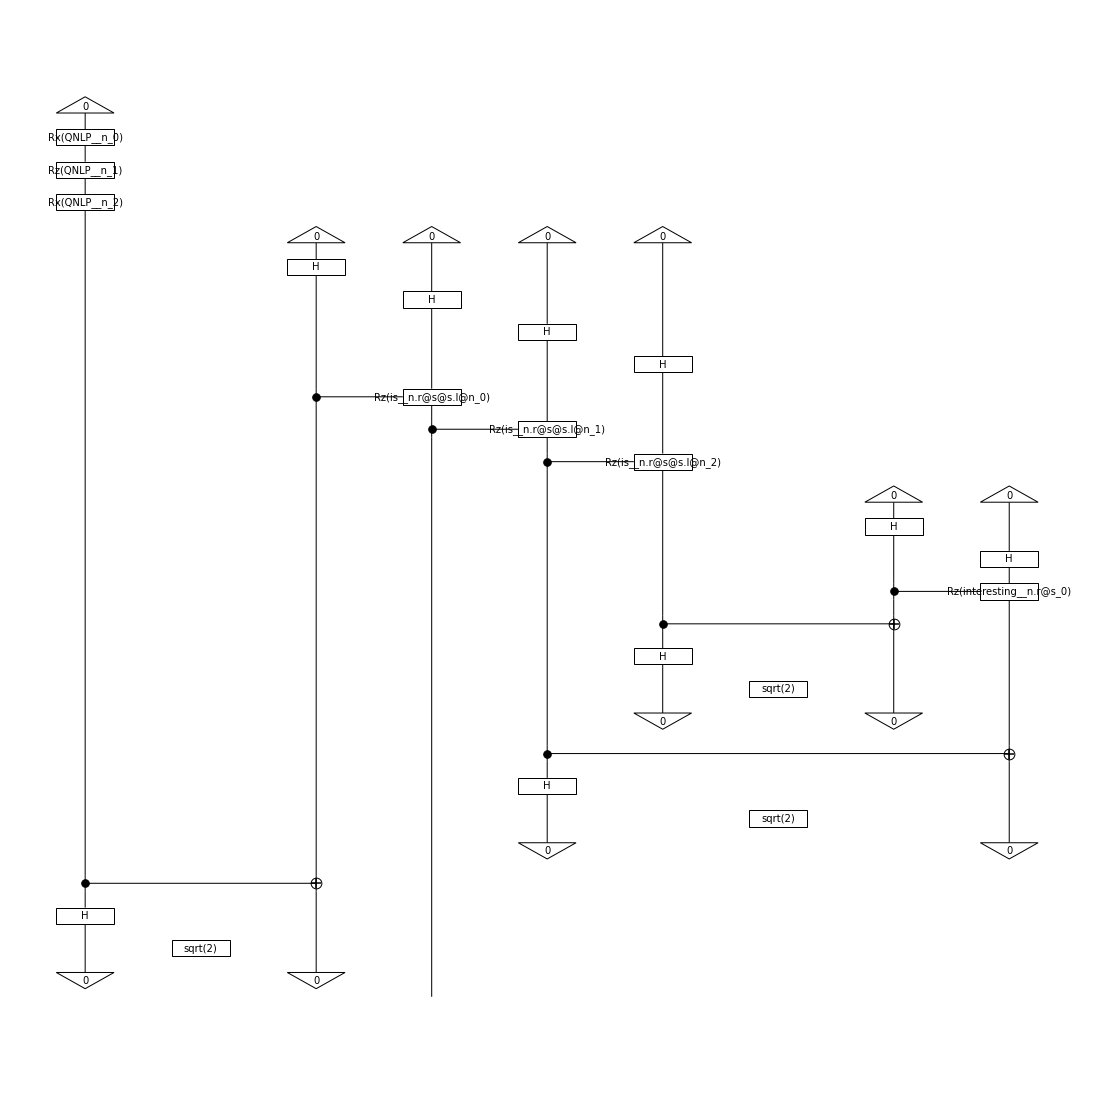

In [7]:
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=1) #number of layers
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,15))

#### Firstly we changed the sentence keeping the noun and legth same. There is not significant difference from the given sentence of 'I Love BU'. However, changed the qubits and classicial bits increased.

This produces a quantum circuit in ```DisCoPy``` form. Conversion to ```pytket``` format is very simple:

In [ ]:
from pytket.circuit.display import render_circuit_jupyter

In [9]:
tket_circuit = discopy_circuit.to_tk()

In [ ]:
render_circuit_jupyter(tket_circuit)

Exporting to pytket format provides additional functionality and allows interoperability. For example, obtaining a qiskit circuit is trivial:

In [10]:
from pytket.extensions.qiskit import tk_to_qiskit

In [11]:
qiskit_circuit = tk_to_qiskit(tket_circuit)

In [ ]:
qiskit_circuit.draw()

In [12]:
qiskit_circuit.h(0)

In [13]:
qiskit_circuit.draw()

┌───────────────────┐     ┌───────────────────┐      »
q_0: ┤ Rx(2*π*QNLP__n_0) ├─────┤ Rz(2*π*QNLP__n_1) ├──────»
     └───────┬───┬───────┘     └───────────────────┘      »
q_1: ────────┤ H ├───────────────────────■────────────────»
             ├───┤         ┌─────────────┴─────────────┐  »
q_2: ────────┤ H ├─────────┤ Rz(2*π*is__n.r@s@s.l@n_0) ├──»
             ├───┤         └───────────────────────────┘  »
q_3: ────────┤ H ├────────────────────────────────────────»
             ├───┤                                        »
q_4: ────────┤ H ├────────────────────────────────────────»
             ├───┤                                        »
q_5: ────────┤ H ├───────────────────────■────────────────»
             ├───┤        ┌──────────────┴───────────────┐»
q_6: ────────┤ H ├────────┤ Rz(2*π*interesting__n.r@s_0) ├»
             └───┘        └──────────────────────────────┘»
c: 6/═════════════════════════════════════════════════════»
                                                          »
«         ┌───────────────────┐                                 ┌───┐          »
«q_0: ────┤ Rx(2*π*QNLP__n_2) ├──────────────────■──────────────┤ H ├──────────»
«         └───────────────────┘                ┌─┴─┐            └┬─┬┘          »
«q_1: ─────────────────────────────────────────┤ X ├─────────────┤M├───────────»
«                                              └───┘             └╥┘           »
«q_2: ──────────────■─────────────────────────────────────────────╫────────────»
«     ┌─────────────┴─────────────┐                               ║       ┌───┐»
«q_3: ┤ Rz(2*π*is__n.r@s@s.l@n_1) ├──────────────■────────────────╫────■──┤ H ├»
«     └───────────────────────────┘┌─────────────┴─────────────┐  ║    │  └───┘»
«q_4: ─────────────────────────────┤ Rz(2*π*is__n.r@s@s.l@n_2) ├──╫────┼────■──»
«                                  └───────────────────────────┘  ║    │  ┌─┴─┐»
«q_5: ────────────────────────────────────────────────────────────╫────┼──┤ X ├»
«                                                                 ║  ┌─┴─┐└┬─┬┘»
«q_6: ────────────────────────────────────────────────────────────╫──┤ X ├─┤M├─»
«                                                                 ║  └───┘ └╥┘ »
«c: 6/════════════════════════════════════════════════════════════╩═════════╩══»
«                                                                 5         3  »
«          ┌─┐┌───┐   
«q_0: ─────┤M├┤ H ├───
«          └╥┘└───┘   
«q_1: ──────╫─────────
«           ║         
«q_2: ──────╫─────────
«           ║      ┌─┐
«q_3: ──────╫──────┤M├
«     ┌───┐ ║  ┌─┐ └╥┘
«q_4: ┤ H ├─╫──┤M├──╫─
«     └┬─┬┘ ║  └╥┘  ║ 
«q_5: ─┤M├──╫───╫───╫─
«      └╥┘  ║   ║   ║ 
«q_6: ──╫───╫───╫───╫─
«       ║   ║   ║   ║ 
«c: 6/══╩═══╩═══╩═══╩═
«       1   4   0   2

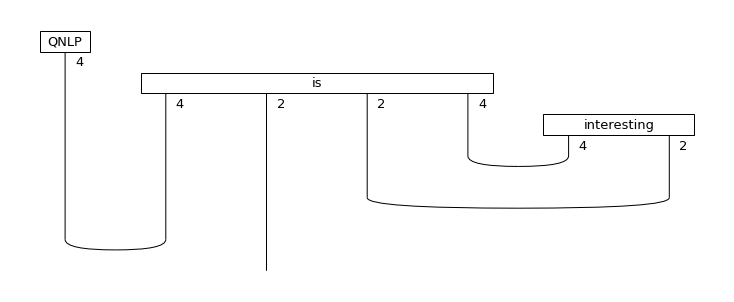

In [14]:
from lambeq import TensorAnsatz
from discopy import Dim

tensor_ansatz = TensorAnsatz({N: Dim(4), S: Dim(2)})
tensor_diagram = tensor_ansatz(diagram)

tensor_diagram.draw(figsize=(10,4), fontsize=13)

### 2nd experiment

In [15]:
sentence1 = 'QNLP class is interesting' #changed the sentence length

In [16]:
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence1)
diagram

Diagram(dom=Ty(), cod=Ty('s'), boxes=[Word('QNLP', Ty('n', Ob('n', z=-1))), Word('class', Ty('n')), Word('is', Ty(Ob('n', z=1), 's', Ob('s', z=-1), 'n')), Word('interesting', Ty(Ob('n', z=1), 's')), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('s', z=-1)), Ty('s')), Cup(Ty('n'), Ty(Ob('n', z=1)))], offsets=[0, 2, 3, 7, 1, 4, 3, 0])

In [17]:
N = AtomicType.NOUN
S = AtomicType.SENTENCE

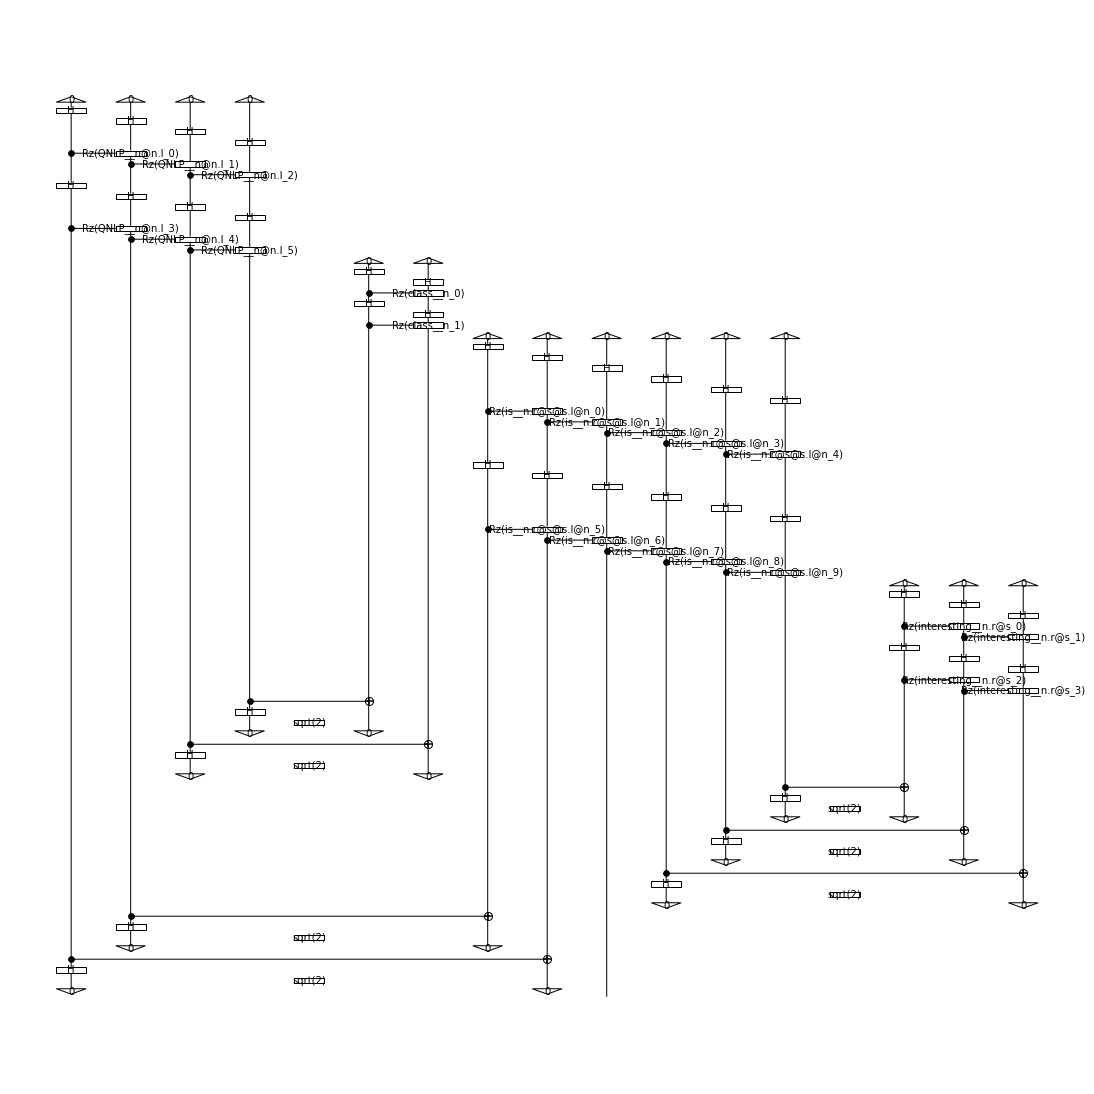

In [18]:
ansatz = IQPAnsatz({N: 2, S: 1}, n_layers=2) #number of layers and nouns changed
discopy_circuit1 = ansatz(diagram)
discopy_circuit1.draw(figsize=(15,15))

###### we changed the sentence, increased the length by 1. We also increased the number of nouns. We furhter experimented with number of layers. The circuit is still readble. However the circuit got bit complex than the previous sentence.  It is also noticeable that quibit increased to 15 bits and the classcial bit also increased to 15 bits. 

In [19]:
tket_circuit1 = discopy_circuit1.to_tk()
#render_circuit_jupyter(tket_circuit1)

In [20]:
from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit1)
qiskit_circuit.draw()

┌───┐                                             ┌───┐              »
 q_0: ┤ H ├───────────────■─────────────────────────────┤ H ├──────────────»
      ├───┤   ┌───────────┴───────────┐                 └───┘              »
 q_1: ┤ H ├───┤ Rz(2*π*QNLP__n@n.l_0) ├───────────────────■────────────────»
      ├───┤   └───────────────────────┘       ┌───────────┴───────────┐    »
 q_2: ┤ H ├───────────────────────────────────┤ Rz(2*π*QNLP__n@n.l_1) ├────»
      ├───┤                                   └───────────────────────┘    »
 q_3: ┤ H ├────────────────────────────────────────────────────────────────»
      ├───┤                                             ┌───┐              »
 q_4: ┤ H ├───────────────■─────────────────────────────┤ H ├──────────────»
      ├───┤     ┌─────────┴──────────┐                  ├───┤              »
 q_5: ┤ H ├─────┤ Rz(2*π*class__n_0) ├──────────────────┤ H ├──────────────»
      ├───┤     └────────────────────┘                  ├───┤              »
 q_6: ┤ H ├───────────────■─────────────────────────────┤ H ├──────────────»
      ├───┤ ┌─────────────┴─────────────┐               └───┘              »
 q_7: ┤ H ├─┤ Rz(2*π*is__n.r@s@s.l@n_0) ├─────────────────■────────────────»
      ├───┤ └───────────────────────────┘   ┌─────────────┴─────────────┐  »
 q_8: ┤ H ├─────────────────────────────────┤ Rz(2*π*is__n.r@s@s.l@n_1) ├──»
      ├───┤                                 └───────────────────────────┘  »
 q_9: ┤ H ├────────────────────────────────────────────────────────────────»
      ├───┤                                                                »
q_10: ┤ H ├────────────────────────────────────────────────────────────────»
      ├───┤                                                                »
q_11: ┤ H ├────────────────────────────────────────────────────────────────»
      ├───┤                                             ┌───┐              »
q_12: ┤ H ├───────────────■─────────────────────────────┤ H ├──────────────»
      ├───┤┌──────────────┴───────────────┐             └───┘              »
q_13: ┤ H ├┤ Rz(2*π*interesting__n.r@s_0) ├───────────────■────────────────»
      ├───┤└──────────────────────────────┘┌──────────────┴───────────────┐»
q_14: ┤ H ├────────────────────────────────┤ Rz(2*π*interesting__n.r@s_1) ├»
      └───┘                                └──────────────────────────────┘»
c: 14/═════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                   »
« q_0: ────────────────────────────────────────────■────────────────»
«                  ┌───┐               ┌───────────┴───────────┐    »
« q_1: ────────────┤ H ├───────────────┤ Rz(2*π*QNLP__n@n.l_3) ├────»
«                  └───┘               └─────────┬───┬─────────┘    »
« q_2: ──────────────■───────────────────────────┤ H ├──────────────»
«        ┌───────────┴───────────┐               ├───┤              »
« q_3: ──┤ Rz(2*π*QNLP__n@n.l_2) ├───────────────┤ H ├──────────────»
«        └───────────────────────┘               └───┘              »
« q_4: ──────────────■──────────────────────────────────────────────»
«          ┌─────────┴──────────┐                                   »
« q_5: ────┤ Rz(2*π*class__n_1) ├───────────────────────────────────»
«          └────────────────────┘                                   »
« q_6: ────────────────────────────────────────────■────────────────»
«                  ┌───┐             ┌─────────────┴─────────────┐  »
« q_7: ────────────┤ H ├─────────────┤ Rz(2*π*is__n.r@s@s.l@n_5) ├──»
«                  └───┘             └───────────┬───┬───────────┘  »
« q_8: ──────────────■───────────────────────────┤ H ├──────────────»
«      ┌─────────────┴─────────────┐             └───┘              »
« q_9: ┤ Rz(2*π*is__n.r@s@s.l@n_2) ├───────────────■────────────────»
«      └───────────────────────────┘ ┌─────────────┴─────────────

#### Some of our observations are: <br>
#### in here the first layer starts with hadamard which transforms all the quibits to superposition.

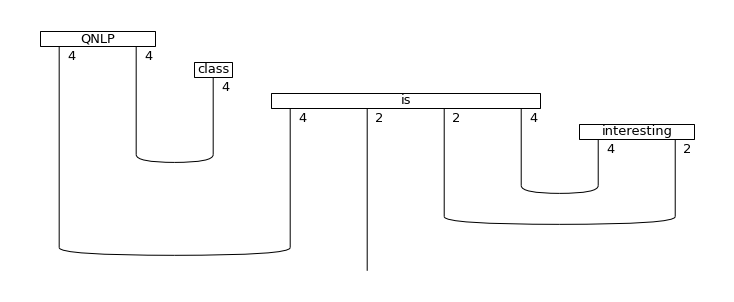

In [21]:
tensor_ansatz = TensorAnsatz({N: Dim(4), S: Dim(2)})
tensor_diagram = tensor_ansatz(diagram)

tensor_diagram.draw(figsize=(10,4), fontsize=13)

### 3rd Experiment

In [22]:
sentence2 = 'QNLP class is interesting. I like the professor. The class is extension of nlp' #changed the sentence length, used 2 sentences

In [23]:
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence2)
diagram

Diagram(dom=Ty(), cod=Ty('s'), boxes=[Word('QNLP', Ty('n', Ob('n', z=-1))), Word('class', Ty('n')), Word('is', Ty(Ob('n', z=1), 's', Ob('s', z=-1), 'n')), Word('interesting.', Ty(Ob('n', z=1), 's')), Word('I', Ty('n')), Word('like', Ty(Ob('n', z=1), Ob('s', z=1), 's', Ob('n', z=-1))), Word('the', Ty('n', Ob('n', z=-1))), Word('professor.', Ty('n')), Word('The', Ty('n', Ob('n', z=-1))), Word('class', Ty('n')), Word('is', Ty(Ob('n', z=1), Ob('s', z=1), 's', Ob('n', z=-1))), Word('extension', Ty('n')), Word('of', Ty(Ob('n', z=1), 'n', Ob('n', z=-1))), Word('nlp', Ty('n')), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('s', z=-1)), Ty('s')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty('s'), Ty(Ob('s', z=1))), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1))), 

In [24]:
N = AtomicType.NOUN
S = AtomicType.SENTENCE

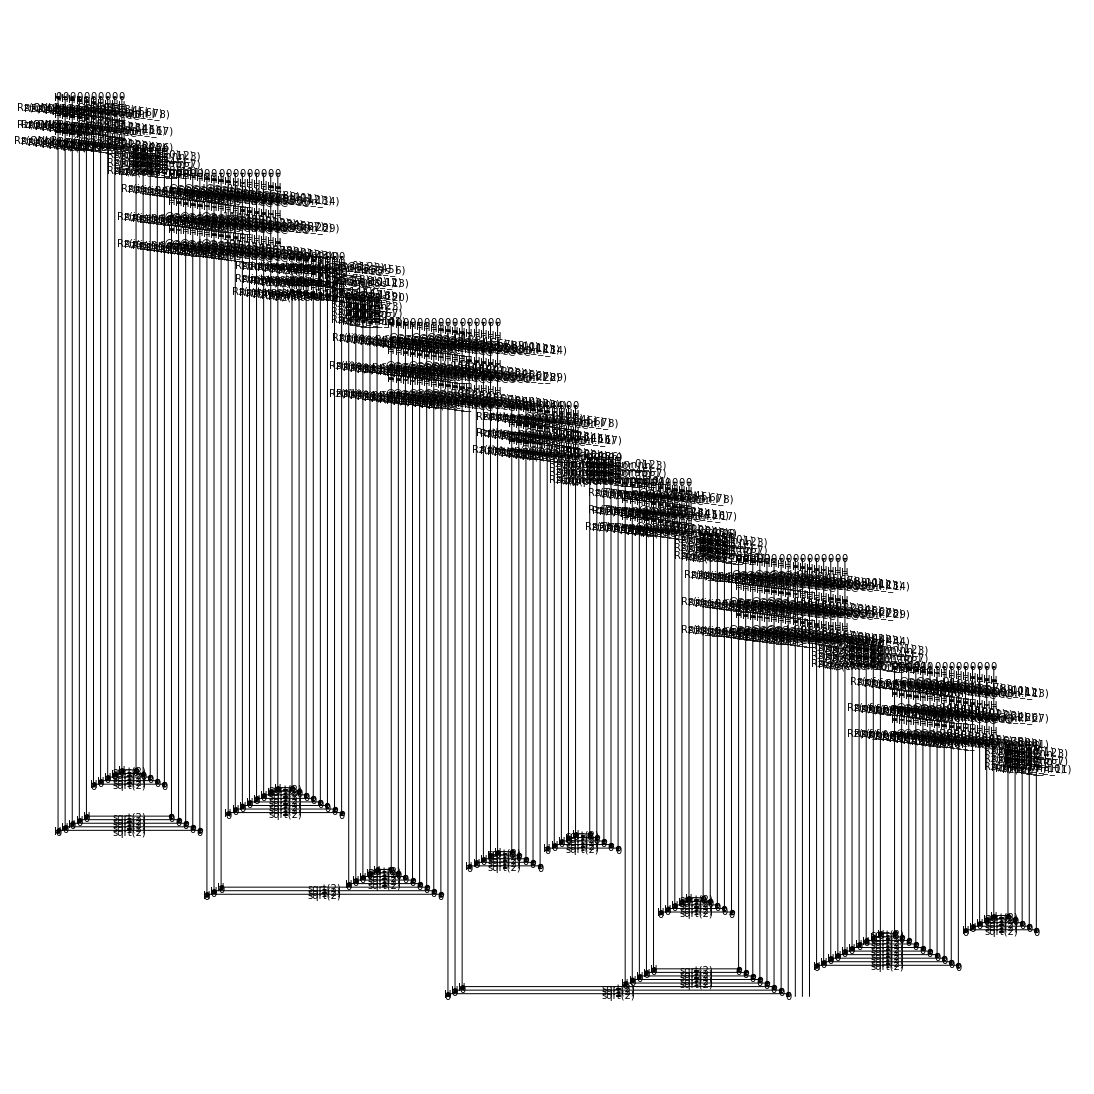

In [25]:
ansatz = IQPAnsatz({N: 5, S: 3}, n_layers=3) #number of layers, changed number of noun also
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,15))

###### The circuit is very difficult to understand. Since we increased the noun numbers and layer numbers also. The quibit number increased also. Increasing way too much is not feasible as classical bit cannot handle it. 

In [ ]:
tket_circuit = discopy_circuit.to_tk()
render_circuit_jupyter(tket_circuit)

In [ ]:
tensor_ansatz = TensorAnsatz({N: Dim(4), S: Dim(2)})
tensor_diagram = tensor_ansatz(diagram)

tensor_diagram.draw(figsize=(10,4), fontsize=13)

# Package versions<a name="packages"></a>

In [ ]:
from platform import python_version
import pytket
import qiskit

print("python version: ", python_version())
print("pytket version: ", pytket.__version__)
print("qiskit version: ", qiskit.__version__)

# Bibliography<a name="references"></a>

[1] [Discopy](https://github.com/oxford-quantum-group/discopy)

[2] [QNLP tutorial](https://discopy.readthedocs.io/en/main/notebooks/qnlp-tutorial.html)

[3] Clark. Something Old, Something New: Grammar-based CCG Parsing with Transformer Models, arXiv:2109.10044, 2021

[4] https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

<!--
# Things to install<a name="install"></a>

Nest lines seem needed.


```python
!pip install pytket-qiskit 
!pip install pytket 
!pip install qiskit 
!pip3 install pytket-pyzx
```
-->